In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical

import random
     
from keras.layers import Dropout
from keras.layers import Flatten

from tensorflow.keras.layers import Conv2D
#from keras.layers.convolutional import Conv2D

from tensorflow.keras.layers import MaxPooling2D
#from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

#from google.colab import drive
import glob

In [6]:
#drive.mount('/Proyecto_Integrador/Algoritmo_CNN/Clasificación_Keras')
file_path = 'Proyecto_Integrador/Algoritmo_CNN/Clasificación_Keras/Data_20240423/*'

#drive.mount('/content/drive')
#file_path = '/content/drive/MyDrive/MNA/DetPeatones/*'

In [4]:
#pedestrian = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/DetPeatones/Pedestrian/*')
noise = glob.glob("OK_Drives_Images_Augmentation/*.png")

#no_pedestrian = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/DetPeatones/NoPedestrian/*')
nonoise = glob.glob("NOK_Drives_Images_Augmentation/*.png")

In [6]:
len(noise)

500

In [8]:
len(nonoise)

500

In [10]:
noise_Formated = []
nonoise_Formated = []

width = 400 
height = 250
dim = (width, height)

for i in noise:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    noise_Formated.append(img_resized)

for i in nonoise:
    img_color = mpimg.imread(i)
    #convert to grayscale
    img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    #resize image
    img_resized = cv2.resize(img_gray, dim, interpolation = cv2.INTER_AREA)
    
    #add the new image to a new array
    nonoise_Formated.append(img_resized)

In [13]:
y_noise = np.ones(len(noise_Formated))
y_nonoise = np.zeros(len(nonoise_Formated))

In [15]:
X = np.vstack((noise_Formated,nonoise_Formated))
X.shape

(1000, 250, 400)

In [17]:
y = np.hstack((y_noise,y_nonoise))
y.shape

(1000,)

In [19]:
X=X/255

In [21]:
# 400 x 250 = 100,000
num_pixels = 100000
X = X.reshape(X.shape[0], num_pixels)
print(X.shape)

(1000, 100000)


In [23]:
model = Sequential()
model.add(Dense(units = 50, input_dim=num_pixels, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units = 10, activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5000050   
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
Total params: 5000670 (19.08 MB)
Trainable params: 5000670 (19.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [25]:
print(X.shape)
print(y.shape)
print(y)

(1000, 100000)
(1000,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
# 25% para el set de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [31]:
model = Sequential()
model.add(Dense(units=1, input_dim=100000, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',  metrics=['accuracy'])

In [33]:
hist = model.fit(x=X_train, y=y_train, verbose=2, batch_size=32,epochs=200, shuffle='true')

Epoch 1/200
24/24 - 2s - loss: 0.6925 - accuracy: 0.4907 - 2s/epoch - 69ms/step
Epoch 2/200
24/24 - 0s - loss: 0.6899 - accuracy: 0.5080 - 168ms/epoch - 7ms/step
Epoch 3/200
24/24 - 0s - loss: 0.6877 - accuracy: 0.5173 - 148ms/epoch - 6ms/step
Epoch 4/200
24/24 - 0s - loss: 0.6858 - accuracy: 0.5107 - 170ms/epoch - 7ms/step
Epoch 5/200
24/24 - 0s - loss: 0.6835 - accuracy: 0.5387 - 180ms/epoch - 7ms/step
Epoch 6/200
24/24 - 0s - loss: 0.6814 - accuracy: 0.5427 - 180ms/epoch - 8ms/step
Epoch 7/200
24/24 - 0s - loss: 0.6795 - accuracy: 0.5547 - 172ms/epoch - 7ms/step
Epoch 8/200
24/24 - 0s - loss: 0.6775 - accuracy: 0.5933 - 172ms/epoch - 7ms/step
Epoch 9/200
24/24 - 0s - loss: 0.6757 - accuracy: 0.6253 - 187ms/epoch - 8ms/step
Epoch 10/200
24/24 - 0s - loss: 0.6740 - accuracy: 0.6240 - 182ms/epoch - 8ms/step
Epoch 11/200
24/24 - 0s - loss: 0.6722 - accuracy: 0.6480 - 172ms/epoch - 7ms/step
Epoch 12/200
24/24 - 0s - loss: 0.6702 - accuracy: 0.6440 - 172ms/epoch - 7ms/step
Epoch 13/200
24

In [35]:
# resumen del model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 100001    
                                                                 
Total params: 100001 (390.63 KB)
Trainable params: 100001 (390.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Text(0.5, 0, 'Epoca')

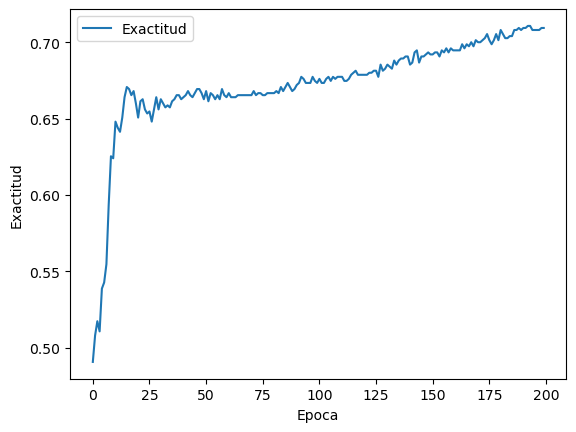

In [37]:
# Exactitud del modelo
plt.plot(hist.history['accuracy']) 
plt.legend(['Exactitud'])
plt.ylabel('Exactitud')
plt.xlabel('Epoca')

Text(0.5, 0, 'Epoca')

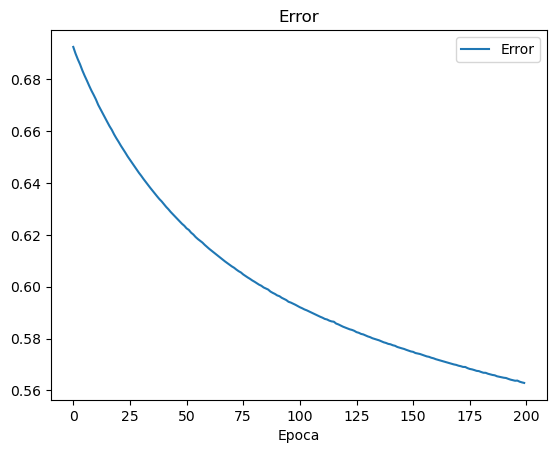

In [39]:
# Función de pérdida
plt.plot(hist.history['loss'])
plt.legend(['Error'])
plt.title('Error')
plt.xlabel('Epoca')